In [25]:
import numpy as np

import seaborn as sns

cm_red = sns.color_palette("Reds", as_cmap=True)
cm_rock = sns.color_palette("rocket_r", as_cmap=True)
cm_dred = sns.color_palette("dark:r_r", as_cmap=True)

display(sns.color_palette("Reds", as_cmap=False))
display(sns.color_palette("rocket_r", as_cmap=False))
display(sns.color_palette("dark:r_r", as_cmap=False))

[(0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982)]

[(0.96516917, 0.70776351, 0.5606593),
 (0.95381595, 0.46373781, 0.31769923),
 (0.8833417, 0.19830556, 0.26014181),
 (0.67824099, 0.09192342, 0.3504148),
 (0.43860848, 0.12177004, 0.34119475),
 (0.20973515, 0.09747934, 0.24238489)]

[(1.0, 0.0, 0.0),
 (0.8384364650442979, 0.026617168897835254, 0.026612196820395968),
 (0.676872930088596, 0.05323433779567051, 0.053224393640791935),
 (0.515309395132894, 0.07985150669350576, 0.07983659046118789),
 (0.3537458601771919, 0.10646867559134102, 0.10644878728158387),
 (0.19218232522148992, 0.13308584448917626, 0.13306098410197983)]

In [2]:
import rasterio
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
src = rasterio.open("Mars_MGS_MOLA_DEM_mosaic_global_1000m_4088.tif")

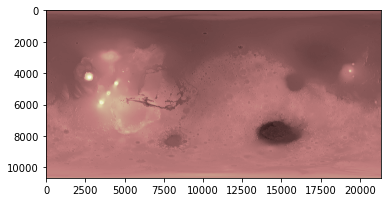

In [4]:
plt.imshow(src.read(1), cmap='pink')

In [5]:
band1 = src.read(1)

In [6]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

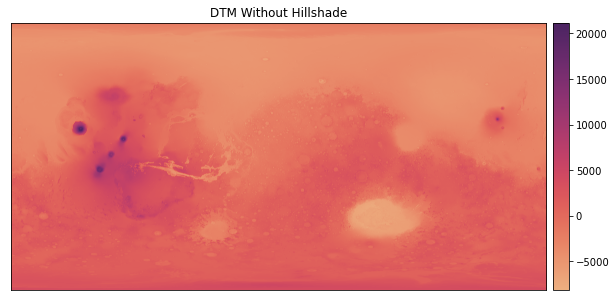

In [12]:
ep.plot_bands(
    band1,
    cmap="flare",
    title="DTM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

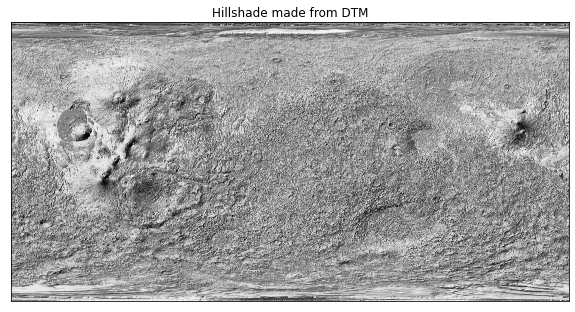

In [8]:
# Create and plot the hillshade with earthpy
# the default value for azimuth in es.hillshade() is 30 degrees.
# the default value for angle_altitude in es.hillshade() is 30 degrees.
# nasa did that:
# https://astrogeology.usgs.gov/search/details/Phobos/MarsExpress/HRSC/Phobos_ME_HRSC_ClrShade_Global_2ppd/cub

hillshade = es.hillshade(band1, altitude=45, azimuth=315)

ep.plot_bands(
    hillshade, cbar=False, title="Hillshade made from DTM", figsize=(10, 6),
)
plt.show()

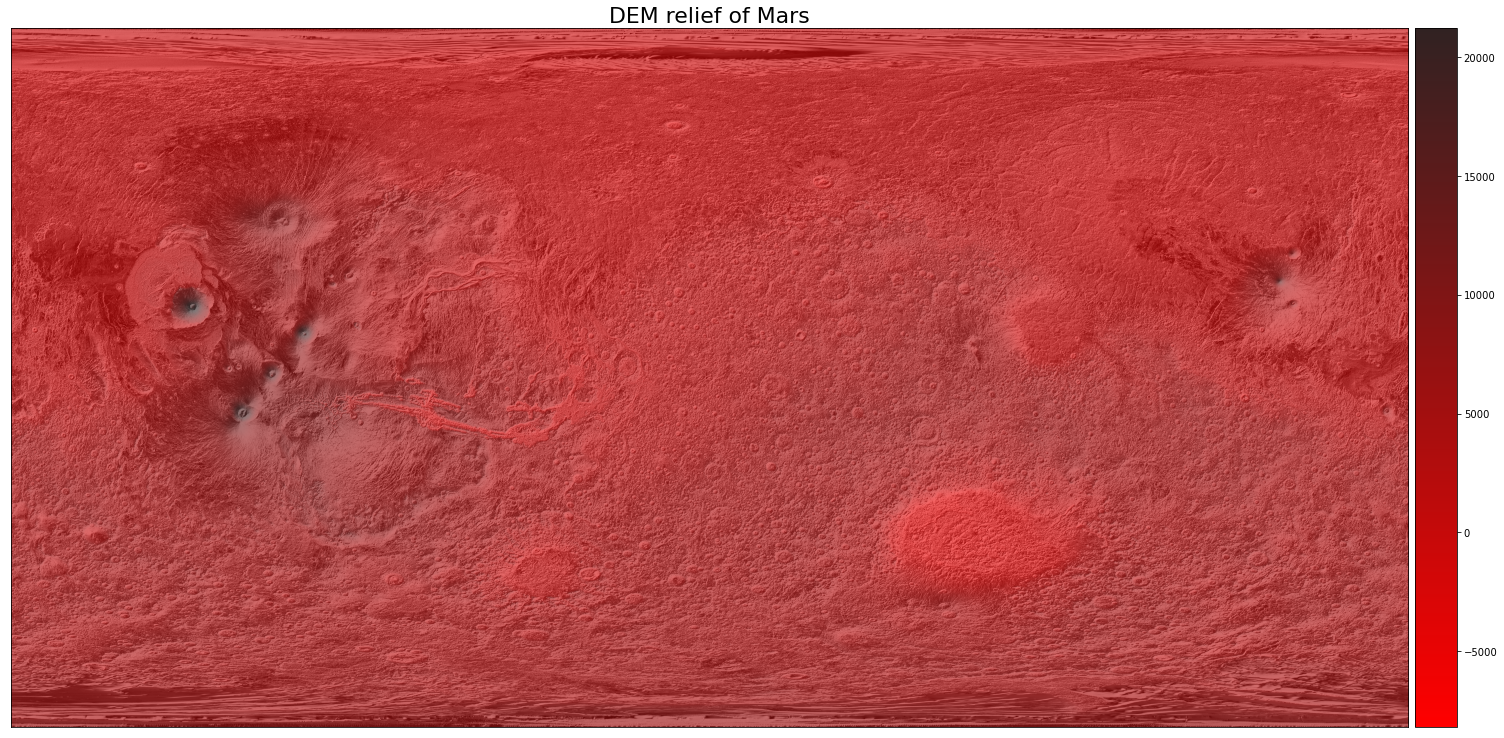

In [27]:
# Plot the DEM and hillshade at the same time
fig, ax = plt.subplots(figsize=(21, 16))

plt.title('DEM relief of Mars',fontsize=22)
plt.rc('legend', fontsize=18)

ep.plot_bands(
    band1,
    ax=ax,
    cmap=cm_dred
)

ax.imshow(hillshade, cmap="Greys", alpha=0.4)

plt.tight_layout()
fig.savefig('../source/_static/day-06-red.png', bbox_inches='tight')

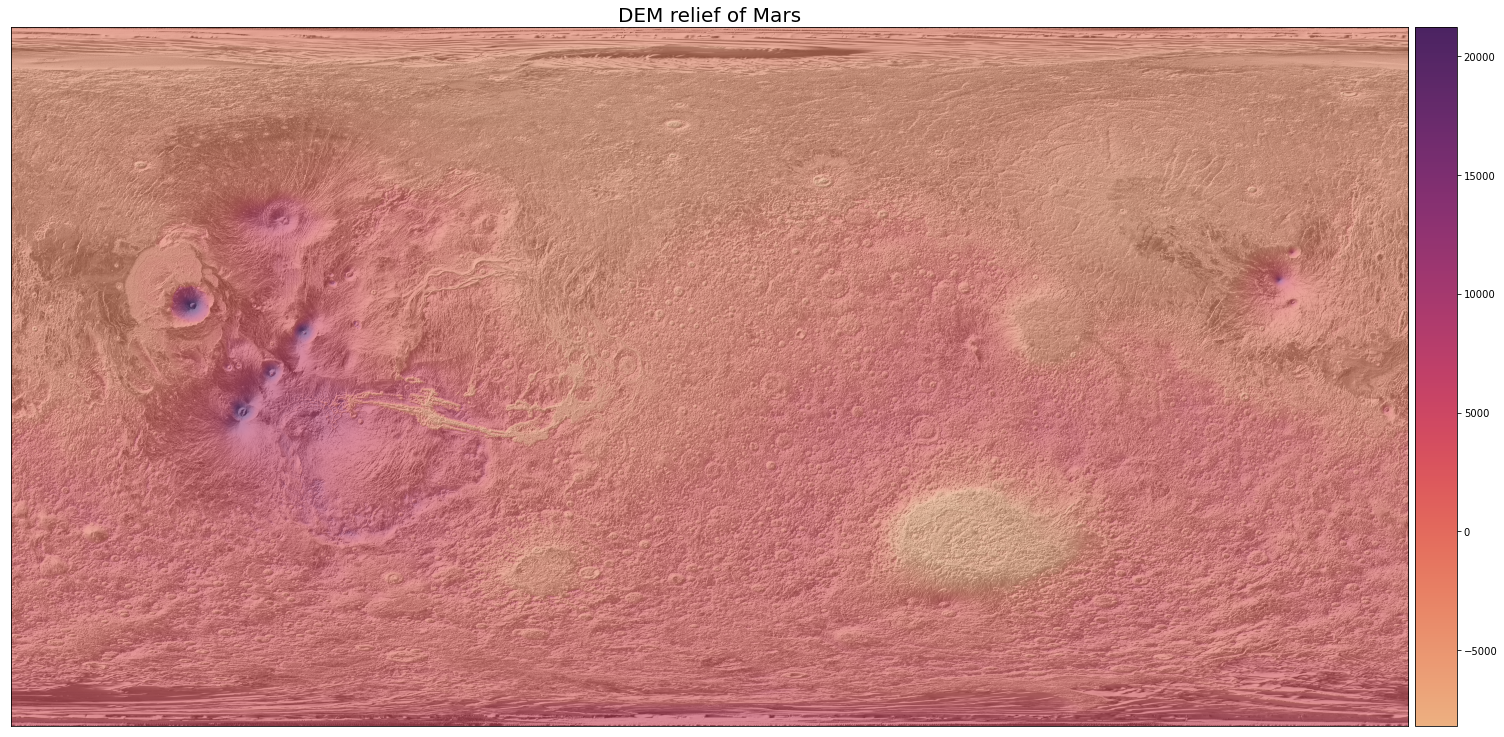

In [13]:
fig, ax = plt.subplots(figsize=(21, 16))

plt.title('DEM relief of Mars',fontsize=20)
plt.rc('legend', fontsize=16)

ep.plot_bands(
    band1,
    ax=ax,
    cmap='flare'
)

ax.imshow(hillshade, cmap="Greys", alpha=0.4)

plt.tight_layout()
fig.savefig('../source/_static/day-06-red.png', bbox_inches='tight')